 ## Minimum Phase Systems

 Minimum phase systems (MPS) are systems where the phase is the absolute minimum possible value for any given magnitude. Defined the other way around: MPS are systems without phase addition from factors not contributing to the magnitude. These factors are only time-delays and RHP zeros. Lets look at the difference between a LHP and RHP zero:



 **The gains of these blocks are different! To prevent them from overlaying.**



In [ ]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from matplotlib.gridspec import GridSpec
from IPython.display import display

import warnings
warnings.filterwarnings("ignore")
from helperFunctions import *
setPlotStyle()


<IPython.core.display.Javascript object>

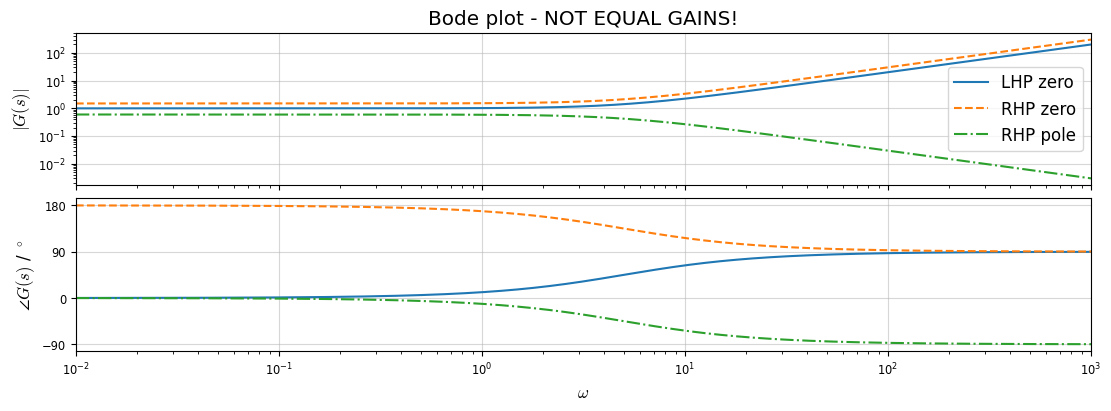

In [ ]:
OM = np.logspace(-2, 3, 700)
S = OM*1j

TFs = [.2*(S + 5.),
       .3*(S - 5.),
       3. / (S + 5.),
        ]

fig, ax = plt.subplots(2,1, sharex=True)
for tf, name, ls in zip(TFs, ["LHP zero", "RHP zero", "RHP pole"], ["-", "--", "-."]):
        T1 = np.log(np.abs(tf))
        PH1 = np.gradient(T1, np.log(OM))
        ax[0].loglog(OM, np.abs(tf), ls, label=name)
        ax[1].semilogx(OM, np.angle(tf, deg=True), ls, label=name)

ax[0].set(title="Bode plot - NOT EQUAL GAINS!", ylabel = "$|G(s)|$")
ax[1].set(xlim=[OM[0], OM[-1]], xlabel = r"$\omega$", ylabel = r"$\angle G(s)$ / ${}^\circ$")
ax[1].yaxis.set_major_locator(MultipleLocator(90))
ax[0].legend()
display(fig)


 This demonstrates the main troubles with RHP zeros: they cause a lot of phase loss, causing stability and performance limitations. One of these limitations is for example demonstrated through the [root locus](https://en.wikipedia.org/wiki/Root_locus_analysis) (which is a very cool topic). In a very limited statement, the root locus says that closed-loop poles move towards zeros for increasingly higher gain feedback. If there is a RHP zero, that means that for high gains at some point a closed loop pole will move to the RHP, destabilising the feedback system. Therefore, there is a limit to the feedback gain you can set. You've seen before too that time delays incur a huge phase loss, limiting the phase crossover frequency.

 
Just to summarise, a system is minimum phase iff:
- There are no RHP zeros *and*
- There are no time delays.